Today we have electronic data from amazon 
---
It contain user rating for various electronic item solg along with category with each item and time of sell.
---
## The data is avalable at kaggle 

In [36]:
#importing the libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


#import the data  
data=pd.read_csv("/content/electronics_cleaned.csv")


#first five column of data 
data.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0,7


In [37]:
#shape 
data.shape

(1292954, 11)

In [38]:
## let cheak the data type of  all columns and along with finding wheather they contain null value or not 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
 10  month       1292954 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 108.5+ MB


In [39]:
##we see that columne brand ,category , user id , item id has object data type but it is string so we change it into string
data['brand']=data['brand'].astype(str)

data['item_id']=data['item_id'].astype(str)

data['user_id']=data['user_id'].astype(str)

data['category']=data['category'].astype(str)

## now we  see that column rating has int69 data type but its actually float  so we change it to as float 
data['rating']=data['rating'].astype(float)


##now we see that column timestamp is obect but it actually timestamp so we convert it into timestamp 
from datetime import datetime
data['timestamp']=pd.to_datetime(data['timestamp'])

In [40]:
#for better understand of data
data.describe()

,rating,year,split,month
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.014977e+03,1.747587e-01,6.340661e+00
std,1.379732e+00,2.117867e+00,5.506810e-01,3.576262e+00
min,1.000000e+00,1.999000e+03,0.000000e+00,1.000000e+00
25%,4.000000e+00,2.014000e+03,0.000000e+00,3.000000e+00
50%,5.000000e+00,2.015000e+03,0.000000e+00,6.000000e+00
75%,5.000000e+00,2.016000e+03,0.000000e+00,9.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00,1.200000e+01


In [41]:
#now we see the no of unique user and item in data 
data.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
month              12
dtype: int64

In [42]:
#cheaking duplicates_value
data.duplicated().sum()

0

In [43]:
#cheaking missing value
data.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
month               0
dtype: int64

In [44]:
##as we see there is one columne user_attr  which is not important so we drop this column 
data.drop(['user_attr'],inplace=True,axis=1)

In [46]:
## let us see the distributions of rating 
data.rating.value_counts()

5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: rating, dtype: int64

here we see that most of the rating is 5

# Q : what is  best year of sale ?

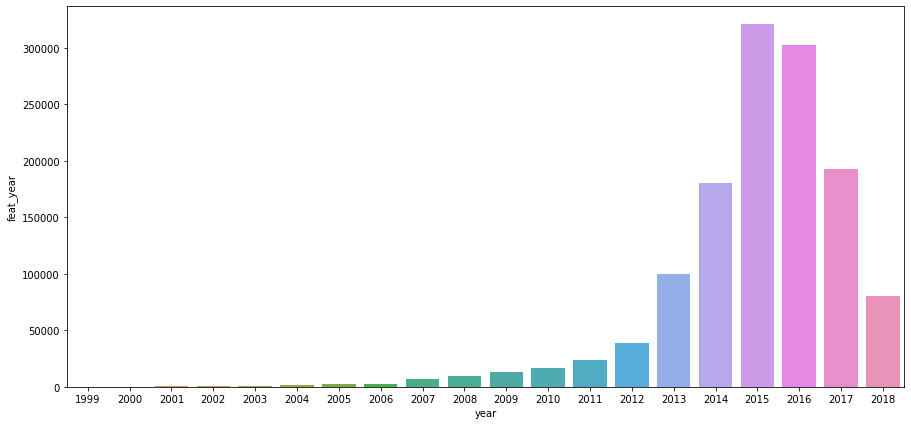

In [48]:
#here we cheak the  best year of sale 
data['feat_year']=pd.DatetimeIndex(data['timestamp']).year

yearly_perfomance=data['feat_year'].value_counts()

yearly_perfomance = pd.DataFrame(yearly_perfomance.reset_index().rename(columns={'index': 'year'}))

##plot _useing barplot
plt.figure(figsize=(15,7))

sns.barplot(data=yearly_perfomance, x="year" ,y="feat_year")

here wee see that 2015 has maximum numbr of sale  now we  find the month that  maximum number of sale

## Q : what is best Month of sale ?

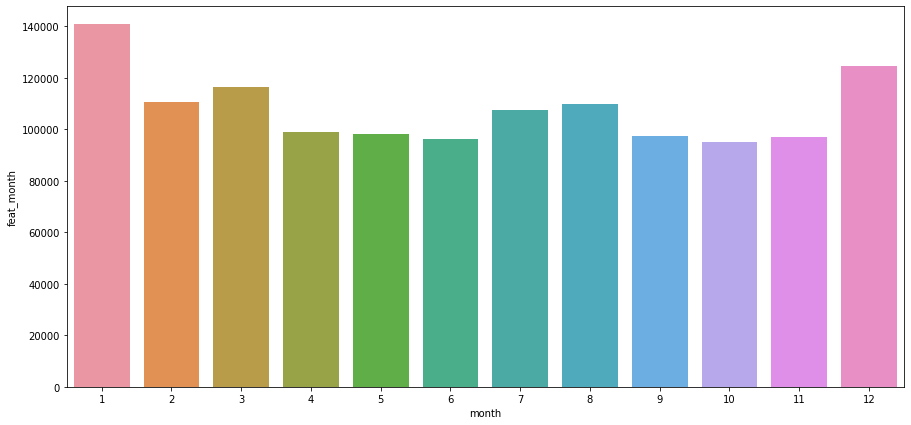

In [49]:
data['feat_month']=pd.DatetimeIndex(data['timestamp']).month


monthly_perfomance =data['feat_month'].value_counts()

monthly_perfomance=pd.DataFrame(monthly_perfomance.reset_index().rename(columns={'index':'month'}))

##plot _useing barplot
plt.figure(figsize=(15,7))

sns.barplot(data=monthly_perfomance, x="month" ,y="feat_month")



here we sew that january was the best month for sale 

## Q : what is most given rating?

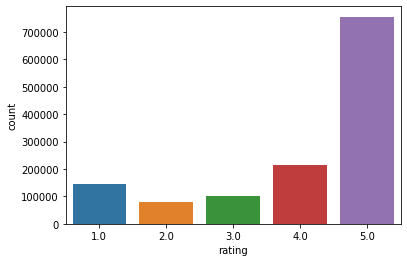

In [50]:
##find the idstribution of rating
sns.countplot(x='rating',data=data)

#Q :which  brand have high sales ?

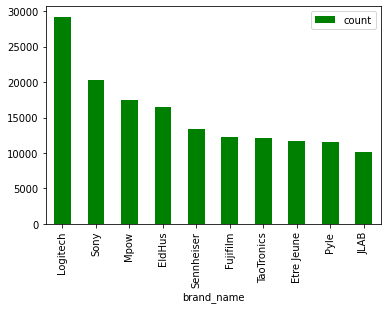

In [51]:
Brand_=pd.DataFrame(data['brand'].value_counts().reset_index().rename(columns={'index':'brand_name','brand':'count'}),)
Brand=Brand_.drop([0, 1])
#ploting the Graph
Brand.head(10).plot(kind='bar',color='green',x='brand_name',legend=True)

## Q: which brand have least sale?

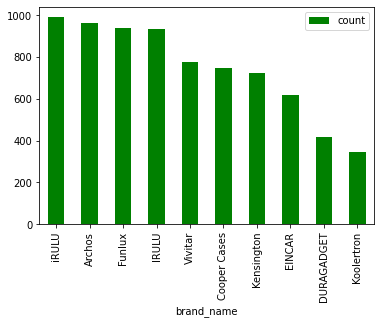

In [52]:
Brand.tail(10).plot(kind='bar',color='green',x='brand_name',legend=True)

## Q  :   Find the brands with the most sales in 2015

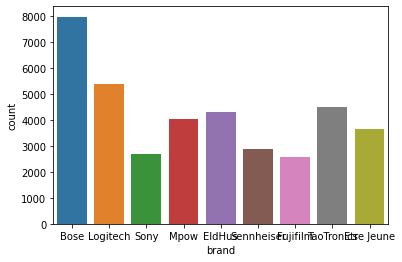

In [81]:
#plot useing seborn 
sns.countplot(x='brand', data=data[data['year'] == 2016], order=data['brand'].value_counts().iloc[1:10].index)

as we see bose has maximum no of sale in 2015


#Q :  which category with the least sales was Security & Surveillance while the most sales were Headphones.


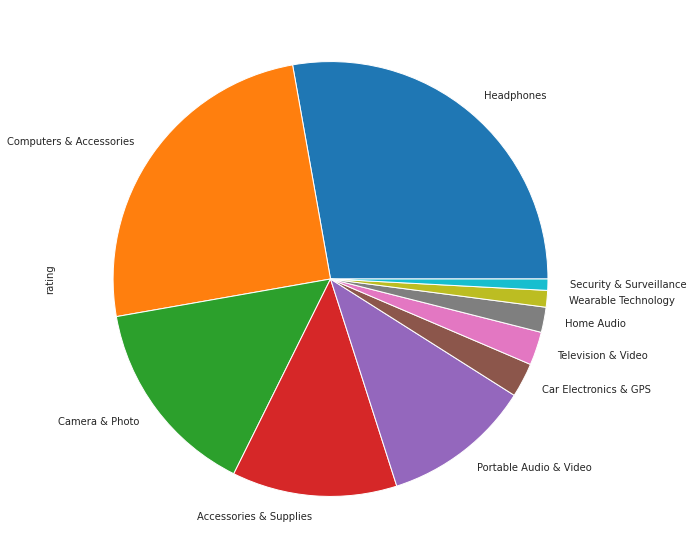

In [85]:
##understand with piechart
plt.figure(figsize=(10,10)) 
sns.set_style('white')
data.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

# conclusion of our analysis

# We can see that the year 2015 had the best sales.

# The month of January had the best sales.

# We can see that the brands Bose and Logitech sold the most

# We can see that the category of Headphones sold the most.

# We can see that the brand name of koolertron sold the least followed closely with DURAGADGET.

# We can see that the category of Security and Surveillance sold the least.